In [1]:
#Homework 2 Goktug Ulkar

#I will get daily values for US 10 Year Bond Yields betwwen 01-01-2019 to the end of 2021

#This data will also be useful for me in my thesis


import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [3]:
#Data is available in the US Department of Treasury website 

url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_long_term_rate&field_tdr_date_value=2021"
df_pandas = pd.read_html(url)
header = df_pandas[0].columns
data = df_pandas[0].values




In [5]:
#Data is seperated into years and I have automated the process to get data from different URLs. Only the year part of the URl changes, so I have coded it so.

vals = None
for year in range(2010, 2022):
    str_year = str(year)
    url = url[:-4] + str_year
    df = pd.read_html(url)[0]
    print(str_year)
    if vals is not None:
        vals = np.vstack((vals, df.values))
    else:
        vals = df.values
    
#This process takes about 5-6 minutes.        
    

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [6]:
df_all = pd.DataFrame(data=vals, columns=header)

In [7]:
df_final = df_all[['Date','LT COMPOSITE (>10 Yrs)', 'TREASURY 20-Yr CMT']]


#data has about 16 empty columns, so i cleaned them here

In [8]:
df_final

,Date,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,01/04/2010,4.42,4.6
1,01/05/2010,4.36,4.54
2,01/06/2010,4.45,4.63
3,01/07/2010,4.44,4.62
4,01/08/2010,4.43,4.61
...,...,...,...
2998,12/27/2021,1.87,1.92
2999,12/28/2021,1.88,1.94
3000,12/29/2021,1.94,2.0
3001,12/30/2021,1.91,1.97


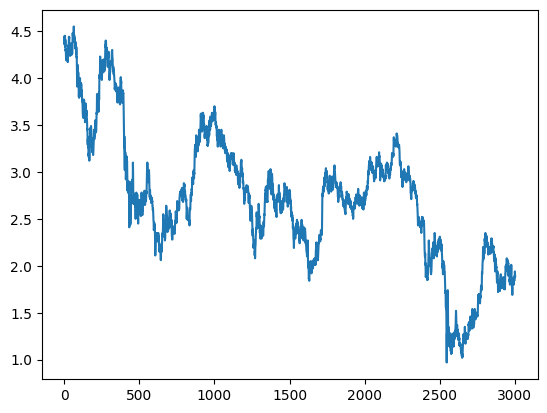

In [9]:
#just something extra
plt.plot(df_final['LT COMPOSITE (>10 Yrs)'].values)
plt.show()